# Movie Industry

Data source: https://www.kaggle.com/danielgrijalvas/movies

Data version as of 23 July 2021



In [1]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)  # Adjust the configuration of the plots we will create

# Read in the data
df = pd.read_csv(r'C:\Users\fwill03\Documents\Jupyter Notebook\Portfolio\Movie data cleaning and correlation in Python\movies.csv')




In [2]:
#pd.set_option('display.max_rows', None)  ## to see all results;
pd.reset_option('^display.', silent=True)  ## to return to default (this using regex); OR
#pd.reset_option('all')  --> will be deprecated

In [3]:
# first look at the data

df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

## Look for missing data

In [5]:
# check if there are any missing data. output the % of missing data per columns. 


#for col in df.columns:
#    pct_missing = np.mean(df[col].isnull())
#    print('{} - {}%'.format(col, pct_missing))

    
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {pct_missing}%')
    

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
df.count(axis= 0)

## a lot of entry has missing budget information

name        7668
rating      7591
genre       7668
year        7668
released    7666
score       7665
votes       7665
director    7668
writer      7665
star        7667
country     7665
budget      5497
gross       7479
company     7651
runtime     7664
dtype: int64

In [7]:
# there are rows with null, so must be dropped

df2 = df.dropna(how='any', axis = 0)

# re-check if there are still missing data
for col in df2.columns:
    pct_missing2 = np.mean(df2[col].isnull())
    print('{} - {}'.format(col, pct_missing2))

name - 0.0
rating - 0.0
genre - 0.0
year - 0.0
released - 0.0
score - 0.0
votes - 0.0
director - 0.0
writer - 0.0
star - 0.0
country - 0.0
budget - 0.0
gross - 0.0
company - 0.0
runtime - 0.0


In [8]:
df2.count(0)

name        5421
rating      5421
genre       5421
year        5421
released    5421
score       5421
votes       5421
director    5421
writer      5421
star        5421
country     5421
budget      5421
gross       5421
company     5421
runtime     5421
dtype: int64

## Exploring Data / Data Cleaning

####  Reset index

In [9]:
df2.isnull()

## notice the index number and total rows are not the same. see below what happens. 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7649,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7650,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7651,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# change data type of columns

df2['budget'] = df2['budget'].astype('int64')
df2['gross'] = df2['gross'].astype('int64')
df2.head()

## warning note below because the index is not reset after dropna(). need to reset index to avoid this. 

<ipython-input-10-9dae78e5879e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['budget'] = df2['budget'].astype('int64')
<ipython-input-10-9dae78e5879e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['gross'] = df2['gross'].astype('int64')


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [11]:
df2.reset_index(inplace = True)
df2.drop(columns = 'index', inplace = True)

<ipython-input-11-fc1239ffc716>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns = 'index', inplace = True)


In [12]:
df2.isnull()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5417,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5418,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5419,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### Separate released column

In [13]:
## Information in the 'year' column is incorrect as some year is different with the year in the 'released' column.  
## We want to separate the released column into date, month, year. 
## However the released column is inconsistent. some entries dont have the month or date information.
## some examples:
df2[1305:1306]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
1305,Killing Zoe,R,Crime,1993,September 1994 (United States),6.5,20000.0,Roger Avary,Roger Avary,Eric Stoltz,France,1500000,418961,Davis-Films,96.0


In [14]:
df2[1637:1638]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
1637,The White Balloon,Unrated,Drama,1995,1995 (Iran),7.7,6900.0,Jafar Panahi,Abbas Kiarostami,Aida Mohammadkhani,Iran,150000,924940,Farabi Cinema Foundation,85.0


In [28]:
## so we worked on the country with delimiter '('' instead of ','
# separate released column to release_date and then only take the year from right. 
df2['year_released'] = df2['released'].str.split('(', 1, expand = True)[0].str[-5:].astype('int')
df2.drop(columns= 'year', inplace= True)
df2.head()

<ipython-input-28-f4b32bf1c3f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year_released'] = df2['released'].str.split('(', 1, expand = True)[0].str[-5:].astype('int')
<ipython-input-28-f4b32bf1c3f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns= 'year', inplace= True)


,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


#### Drop any duplicates

In [16]:
df2.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000,426505244,Columbia Pictures,124.0,2020
5417,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000,319715683,Paramount Pictures,99.0,2020
5418,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000,245487753,Universal Pictures,101.0,2020
5419,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000,111105497,20th Century Studios,100.0,2020


## Correlations 

#### Gross revenue vs budget


Text(0, 0.5, 'Gross Revenue')

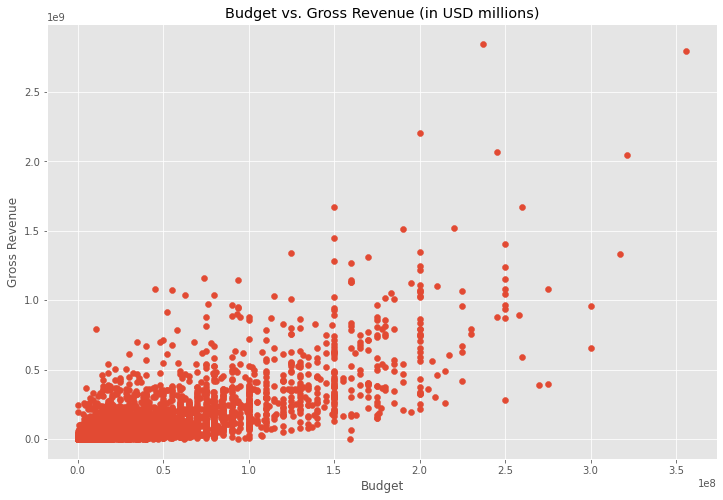

In [17]:
#Scatter plot of gross revenue vs. budget

plt.scatter(x= df2['budget'], y= df2['gross'])
plt.title('Budget vs. Gross Revenue (in USD millions)')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')

<AxesSubplot:xlabel='budget', ylabel='gross'>

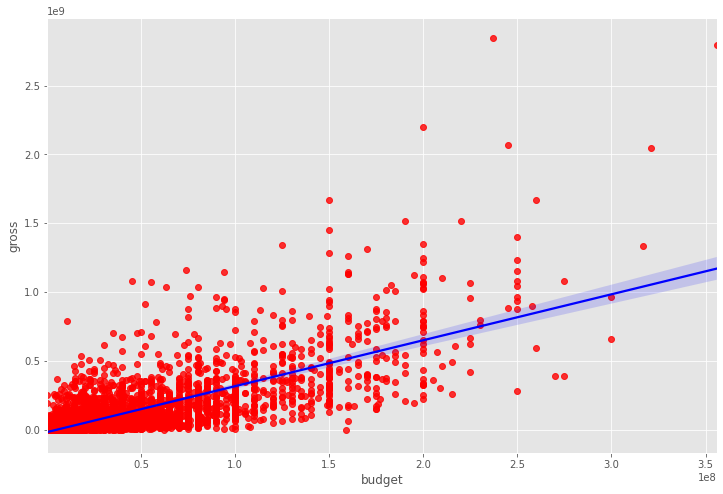

In [18]:
# Regression Plot using seaborn

sns.regplot(x= 'budget', y= 'gross', data= df2, scatter_kws= {'color': 'red'}, line_kws= {'color':'blue'})


## We can see, in general the higher the budget, the higher the gross revenue. 

In [29]:
# To confirm, use .corr() method :

df2.corr(method= 'pearson')

# highest correlation between budget and gross; votes and gross comes second. 
# notice only columns with numeric value showed in the correlation table below. 

,score,votes,budget,gross,runtime,year_released
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
year_released,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


Text(87.0, 0.5, 'Gross Revenue')

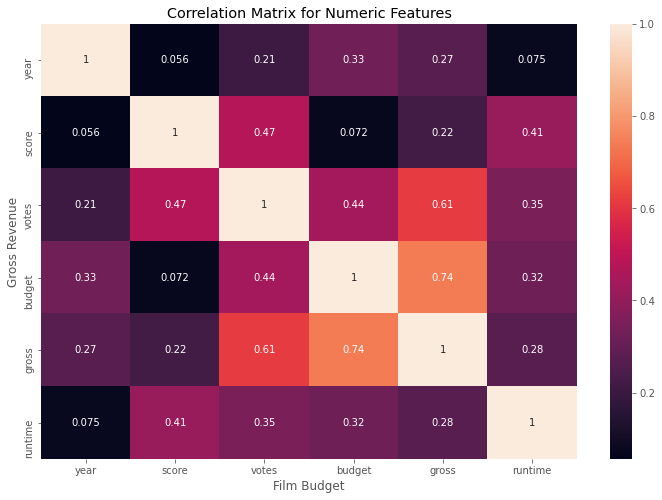

In [20]:
correlation_matrix = df2.corr()

sns.heatmap(data= correlation_matrix, annot= True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

#### Correlation with other Factors (e.g. company, directors, etc)

In [33]:
# Data in other columns such as 'company', 'directors', etc are as object. Need to assign categorial value to them so that we can find the correlation.

df2_numerized = df2

for col_name in df2_numerized.columns:
    if(df2_numerized[col_name].dtype == 'object'):
        df2_numerized[col_name] = df2_numerized[col_name].astype('category')
        df2_numerized[col_name] = df2_numerized[col_name].cat.codes

df2_numerized


<ipython-input-33-c058d4441e51>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_numerized[col_name] = df2_numerized[col_name].astype('category')
<ipython-input-33-c058d4441e51>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_numerized[col_name] = df2_numerized[col_name].cat.codes
<ipython-input-33-c058d4441e51>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_released
0,4692,6,6,1304,8.4,927000.0,1795,2832,699,46,19000000,46998772,1426,146.0,1980
1,3929,6,1,1127,5.8,65000.0,1578,1158,214,47,4500000,58853106,452,104.0,1980
2,3641,4,0,1359,8.7,1200000.0,757,1818,1157,47,18000000,538375067,945,124.0,1980
3,204,4,4,1127,7.7,221000.0,889,1413,1474,47,3500000,83453539,1108,88.0,1980
4,732,6,4,1170,7.3,108000.0,719,351,271,47,6000000,39846344,1083,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5416,415,6,0,904,6.6,140000.0,16,2390,1812,47,90000000,426505244,452,124.0,2020
5417,3556,4,0,713,6.5,102000.0,852,2309,147,47,85000000,319715683,1108,99.0,2020
5418,1153,4,1,904,5.6,53000.0,1809,2827,1470,47,175000000,245487753,1397,101.0,2020
5419,3978,4,1,758,6.8,42000.0,294,2091,640,6,135000000,111105497,12,100.0,2020


<AxesSubplot:>

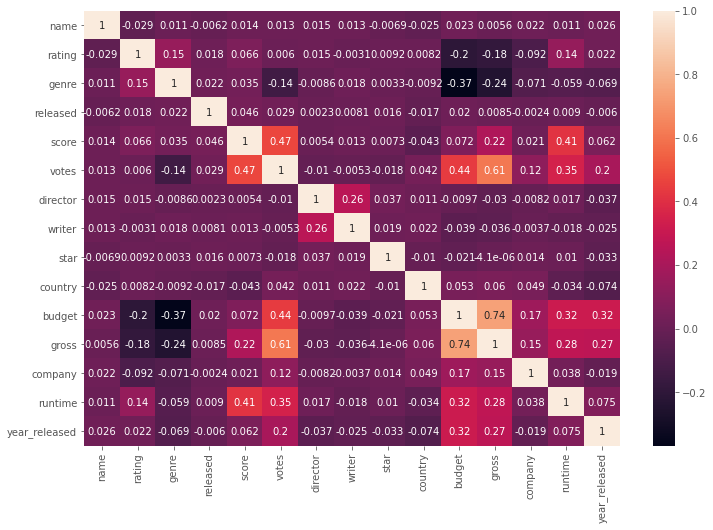

In [35]:
correlation_matrix2 = df2_numerized.corr()

sns.heatmap(correlation_matrix2, annot= True)

# From below heatmap, other factors/ features such as company, directors, etc don't have high correlation with the gross revenue.

In [39]:
# Filtering features 

# first we unstack then sort the data into pairs (i.e. genre vs. budget, genre vs. score, etc)
corr_pairs = df2_numerized.corr().unstack().sort_values()
corr_pairs

genre     budget     -0.368523
budget    genre      -0.368523
genre     gross      -0.244101
gross     genre      -0.244101
budget    rating     -0.203946
                        ...   
          budget      1.000000
score     score       1.000000
released  released    1.000000
country   country     1.000000
company   company     1.000000
Length: 225, dtype: float64

In [56]:
high_corr = corr_pairs[(corr_pairs > 0.5) & (corr_pairs < 0.999999)]
high_corr

gross   votes     0.614751
votes   gross     0.614751
budget  gross     0.740247
gross   budget    0.740247
dtype: float64